In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from datetime import datetime as dt
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords 
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from pylab import *
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Burak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Burak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


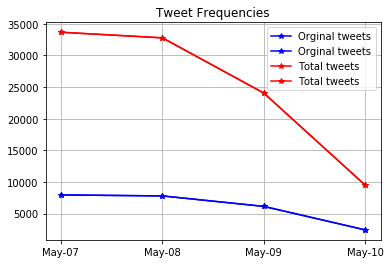

In [19]:
def problemA()
    tweets = []
    count=0
    tweets=[]
    tweets_clean=[]
    for line in open('random_100k_set1.jsonl', 'r'):
        #count=count+1
        #if count==300:
        #    break
        tweets.append(json.loads(line))
        
    for tweet in tweets:
        if "limit" not in tweet.keys():
            tweets_clean.append(tweet)
    tweets=tweets_clean
    
    def get_users(tweets):
        users = tweets.get('user', {})
        ids = users.get('screen_name', [])
        return [ids]
    
    def get_dates(tweet):
        time = dt.fromtimestamp(int(tweet.get('timestamp_ms'))/1000).strftime('%b-%d')
        
        return[time]
    
    def get_retweet(tweet):
        if tweet.get('retweeted_status') is not None:
            a=1               
        else:
            a=0
        return[a]
    
    users=[]
    times=[]
    retweets=[]
    
    for tweet in tweets:
        users.extend(get_users(tweet))
        
    for tweet in tweets:
        times.extend(get_dates(tweet))
        
    for tweet in tweets:
        retweets.extend(get_retweet(tweet))
    dic= {"date": times,"screen_name":users,"retweet_status":retweets}
    df_tweets=pd.DataFrame(dic)
    df_original=df_tweets[df_tweets["retweet_status"]==0]
    df_total=df_tweets
        
    #df=pd.DataFrame.from_dict(tweets)
    #df_total=pd.DataFrame()
    #df_total["created_at"]=df["created_at"].str[4:10]
    #df_total["original"]=df["retweeted_status"]
    #df_total.fillna(1,inplace=True)
    #df_total=df_total[df_total.created_at!=1]
    #df_original=df_total[df_total.original==1]
    df_original_group=df_original.groupby(by="date").count()
    df_total_group=df_total.groupby(by="date").count()
    
    plt.plot(df_original_group,label="Orginal tweets",color='blue',marker='*')
    plt.plot(df_total_group,label="Total tweets",color='red',marker='*')
    plt.title('Tweet Frequencies')
    plt.legend(loc='best')
    plt.grid()
    
    plt.show();

problemA()

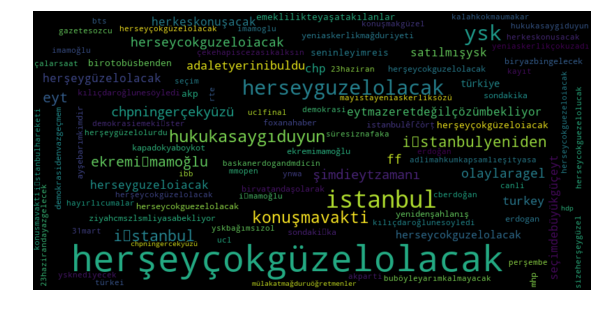

In [5]:
def problemB():
    tweets1=[json.loads(line) for line in open('random_100k_set1.jsonl')]
    
    def get_hashtags(tweets):
        entities = tweets.get('entities', {})
        hashtags = entities.get('hashtags', [])
        return [tag['text'].lower() for tag in hashtags]
    
    hashtags=[]
    for tweet in tweets1:
        hashtags.extend(get_hashtags(tweet))
    
    c=Counter(hashtags)
    wordcloud=WordCloud(max_words=100,width=800, height=400).generate_from_frequencies(c)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
problemB()

In [3]:
def problemC():
    count=0
    tweets=[]
    tweets_clean=[]
    for line in open('random_100k_set1.jsonl', 'r'):
        #count=count+1
        #if count==300:
        #    break
        tweets.append(json.loads(line))
        
    for tweet in tweets:
        if "limit" not in tweet.keys():
            tweets_clean.append(tweet)
    tweets=tweets_clean
    
    def get_users(tweets):
        users = tweets.get('user', {})
        ids = users.get('screen_name', [])
        return [ids]
    
    def get_dates(tweet):
        time = dt.fromtimestamp(int(tweet.get('timestamp_ms'))/1000).strftime('%b-%d')
        
        return[time]
    
    def get_retweet(tweet):
        if tweet.get('retweeted_status') is not None:
            a=1               
        else:
            a=0
        return[a]
    
    users=[]
    times=[]
    retweets=[]
    
    for tweet in tweets:
        users.extend(get_users(tweet))
        
    for tweet in tweets:
        times.extend(get_dates(tweet))
        
    for tweet in tweets:
        retweets.extend(get_retweet(tweet))
    dic= {"date": times,"screen_name":users,"retweet_status":retweets}
    df_tweets=pd.DataFrame(dic)
    df_tweets=df_tweets[df_tweets["retweet_status"]==0]
    a=df_tweets[df_tweets["date"]=="May-07"].screen_name
    b=df_tweets[df_tweets["date"]=="May-08"].screen_name
    c=df_tweets[df_tweets["date"]=="May-09"].screen_name
    d=df_tweets[df_tweets["date"]=="May-10"].screen_name
    return(len(list(set(a) & set(b)& set(c)& set(d))))

problemC()

28

In [12]:
def problemD():
    tweets=[]
    tweets_clean=[]
    for line in open('random_100k_set1.jsonl', 'r'):
        #count=count+1
        #if count==300:
        #    break
        tweets.append(json.loads(line))
        
    for tweet in tweets:
        if "limit" not in tweet.keys():
            tweets_clean.append(tweet)
    tweets=tweets_clean
    
    def get_users(tweets):
            users = tweets.get('user', {})
            ids = users.get('screen_name', [])
            return [ids]
        
    
    
    def get_retweet(tweet):
        if tweet.get('retweeted_status') is not None:
            a=1               
        else:
            a=0
        return[a]
            
    users=[]
    retweets=[]
    
    for tweet in tweets:
            users.extend(get_users(tweet))
            
    for tweet in tweets:
        retweets.extend(get_retweet(tweet))
        
    dic= {"screen_name":users,"retweet_status":retweets}
    df_tweets=pd.DataFrame(dic)
    df_tweets=df_tweets[df_tweets["retweet_status"]==0]
    
    c=Counter(df_tweets.screen_name)
    c.most_common(20)

    
    
    return(c.most_common(20))

problemD()

[('MuratNR3', 49),
 ('gokhn_zm', 35),
 ('chp_sfo', 23),
 ('chp_la', 18),
 ('chp_sac', 17),
 ('riyanka81776079', 16),
 ('Dharman35031837', 14),
 ('HasittirTV', 14),
 ('ziraataysee', 14),
 ('sriyanka18', 13),
 ('Dushyan13733516', 12),
 ('IslamGoksal', 11),
 ('chp_riv', 11),
 ('furerePhilosop', 11),
 ('Ayush31147008', 11),
 ('paguni2', 11),
 ('t24comtr', 11),
 ('gazeteturkorg', 11),
 ('halktvcomtr', 11),
 ('HamzaKerem2019', 10)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


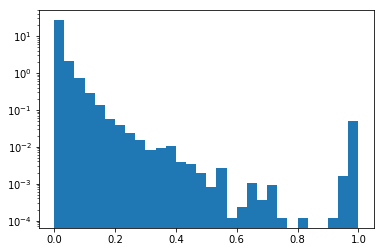

In [11]:
def problemE():
    count=0
    tweets=[]
    for line in open('random_100k_set1.jsonl', 'r'):
        count=count+1
        if count==3000:
            break
        tweets.append(json.loads(line))
        
    def get_text(tweets):
            text = tweets.get('text', {})
            return [text]
        
    
    
    def get_retweet(tweet):
        if tweet.get('retweeted_status') is not None:
            a=1               
        else:
            a=0
        return[a]
            
    texts=[]
    retweets=[]
    
    for tweet in tweets:
            texts.extend(get_text(tweet))
            
    for tweet in tweets:
        retweets.extend(get_retweet(tweet))
        
    dic= {"text":texts,"retweet_status":retweets}
    df_tweets=pd.DataFrame(dic)
    df_tweets=df_tweets[df_tweets["retweet_status"]==0]
    tweets=df_tweets.text
        
    def delete_links(text):
        
        text = re.sub(r"http\S+", "", text)
        return [text]    
    def delete_handles(text):
        text_new=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
        return[text_new]
    def delete_RT(text):
        text_new=re.compile('\#').sub('', re.compile('RT').sub('', text, count=1).strip())
        return[text_new] 
    def delete_emoji(text):
        return [text.encode('ascii', 'ignore').decode('ascii')]
    def delete_StopWords(text):
        stops=set(stopwords.words("turkish"))
        for stop in stops:
            text_new = re.sub(stop, "", text) 
        return[text_new]
    
    text1=[]
    for tweet in tweets:
        text1.extend(delete_links(tweet))
    
    text2=[]
    for text in text1:
        text2.extend(delete_handles(text))
        
    text3=[]
    for text in text2:
        text3.extend(delete_RT(text))
        
    text4=[]
    for text in text3:
        text4.extend(delete_emoji(text))
        
    text5=[]
    for text in text4:
        text5.extend(delete_StopWords(text))
        
    
    
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(text5).toarray()
    
    similarities=[]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            aa = matrix[i].reshape(1,len(matrix[i]))
            ba = matrix[j].reshape(1,len(matrix[j]))
            similarities.extend(cosine_similarity(aa,ba)[0])
    
    plt.hist(similarities, normed=True, bins=30)
    plt.yscale('log')
    plt.show()
    #plt.subplot(211)
    #hist, bins, _ = plt.hist(similarities, bins=8)
    #
    ## histogram on log scale. 
    ## Use non-equal bin sizes, such that they look equal on log scale.
#
    #plt.subplot(212)
    #plt.hist(similarities,bins=30)
    #plt.yscale('log')
    #plt.show()
    #
problemE()